# YOLACT Google Colab Notebook

# Initial Setup

In [0]:
# Mount Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import matplotlib.pyplot as plt

# Dark mode
plt.style.use(['dark_background'])

## Clone the repo

In [0]:
# Make sure we're in the top folder
%cd /content

# Clone the repo
!git clone https://github.com/Maxinho96/yolact

/content
Cloning into 'yolact'...
remote: Enumerating objects: 3054, done.
remote: Total 3054 (delta 0), reused 0 (delta 0), pack-reused 3054
Receiving objects: 100% (3054/3054), 21.29 MiB | 35.23 MiB/s, done.
Resolving deltas: 100% (2085/2085), done.


In [0]:
# Pull in case of modifications
%cd /content/yolact/
!git pull

/content/yolact
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/Maxinho96/yolact
   558fd66..9e1ddb2  master     -> origin/master
Updating 558fd66..9e1ddb2
Fast-forward
 data/config.py | 58 ++++++++++++++++++++++++++++++++++++++++++++++++++++------
 1 file changed, 52 insertions(+), 6 deletions(-)


## DCNv2
The DCNv2 external library is needed for this to work, so we'll build it now.

**IF YOU GET CUDA ERRORS** You need to change the Runtime of this notebook to "GPU" as mentioned at the top of the notebook.

In [0]:
# Change to the right directory
%cd /content/yolact/external/DCNv2

# Build DCNv2
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/content
creating build/temp.linux-x86_64-3.6/content/yolact
creating build/temp.linux-x86_64-3.6/content/yolact/external
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.6/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/yolact/external/DCNv2/src -I/usr/local/lib/python3.6/dist-packages/torch/include -I/usr/local/lib/python3.6/dist-packages/torch/include/torch/csrc/api/include -I/usr/local/lib/python3.6/dist-packages/torch/include/TH -I/usr/local/

## OCHuman

In [0]:
%cd /content

!git clone https://github.com/Maxinho96/OCHumanApi
%cd OCHumanApi
!make install

/content
Cloning into 'OCHumanApi'...
remote: Enumerating objects: 77, done.
remote: Total 77 (delta 0), reused 0 (delta 0), pack-reused 77
Unpacking objects: 100% (77/77), done.
/content/OCHumanApi
# install ochumanApi to the Python site-packages
python setup.py build_ext install
Compiling ochumanApi/_mask.pyx because it changed.
[1/1] Cythonizing ochumanApi/_mask.pyx
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/OCHumanApi/ochumanApi/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'ochumanApi._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/ochumanApi
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -IochumanApi -I/usr/local/li

## Pretrained Weights
In order to run inference, we'll need some pre-trained weights. The creator of the GitHub repo shared them on Google Drive. We're going to use a [helpful tool](https://github.com/chentinghao/download_google_drive) made by [chentinghao](https://github.com/chentinghao) to easily access the Drive file from Colab.

If this stops working, it's probably because the weights moved to a different location. Check the YOLACT github repo to see where they went.

In [0]:
# Make sure we're in the top folder
%cd /content

# Clone the repo
!git clone https://github.com/chentinghao/download_google_drive.git

# Create a new directory for the pre-trained weights
!mkdir -p /content/yolact/weights

# Download the file
!python ./download_google_drive/download_gdrive.py 1ZPu1YR2UzGHQD0o1rEqy-j5bmEm3lbyP ./yolact/weights/yolact_plus_resnet50_54_800000.pth

/content
Cloning into 'download_google_drive'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Unpacking objects: 100% (16/16), done.
129MB [00:01, 85.4MB/s]


# Evaluate pretrained model

### Download COCO val

In [0]:
%cd /content/yolact

!sh data/scripts/COCO_val.sh

/content/yolact
navigating to ./data/ ...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  46.3M      0  0:00:16  0:00:16 --:--:-- 48.2M
Extracting val images ...
replace 000000212226.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Removing val zip file ...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  43.5M      0  0:00:05  0:00:05 --:--:-- 48.5M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  40.9M      0  0:00:05  0:00:05 --:--:-- 46.8M
Finished downloading. Now extracting ...
Extracting annotations ...
replace ../annotations/instances_train2014.json? [y]es, [n]o,

### Evaluate on COCO val


In [0]:
%cd /content/yolact

!python eval.py --trained_model=weights/yolact_plus_resnet50_54_800000.pth

/content/yolact
Config not specified. Parsed yolact_plus_resnet50_config from the file name.

loading annotations into memory...
Done (t=0.48s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████   4952 /   4952 (100.00%)     9.09 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 34.94 | 55.41 | 53.17 | 50.49 | 47.40 | 43.20 | 37.83 | 30.48 | 20.95 |  9.30 |  1.15 |
  mask | 33.69 | 52.72 | 50.23 | 47.29 | 44.45 | 40.50 | 35.59 | 29.91 | 21.88 | 11.93 |  2.43 |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+



### Generate COCO Person annotations

In [0]:
%cd /content/yolact/data/scripts

!python COCO_person.py

/content/yolact/data/scripts
loading annotations into memory...
Done (t=13.85s)
creating index...
index created!
Loading annotations/instances_train2017.json
Deleting categories
Writing annotations/instances_train2017_person.json
loading annotations into memory...
Done (t=0.40s)
creating index...
index created!
Loading annotations/instances_val2017.json
Deleting categories
Writing annotations/instances_val2017_person.json


### Evaluate on COCO Person val

In [0]:
%cd /content/yolact

!python eval.py --trained_model=weights/yolact_plus_resnet50_54_800000.pth --config=yolact_plus_resnet50_ochuman_config --only_person

/content/yolact
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Loading model... Done.

Processing Images  ███░░░░░░░░░░░░░░░░░░░░░░░░░░░    302 /   2693 (11.21%)     9.82 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  █████████░░░░░░░░░░░░░░░░░░░░░    863 /   2693 (32.05%)     9.73 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ██████████████████████████████   2693 /   2693 (100.00%)     9.85 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 41.23 | 68.67 | 65.88 | 62.15 | 57.06 | 50.98 | 42.76 | 33.45 | 21.61 |  9.16 |  0.59 |
  mask | 37.46 | 64.17 | 60.83 | 56.99 | 52.01 | 46.08 | 38.73 | 28.99 | 18.24 |  7.35 |  1.20 |
-------+-------

# Train

## OCHuman

### Download OCHuman

In [0]:
%cd /content

# Make dirs
!mkdir -p yolact/data/coco/annotations
!mkdir -p yolact/data/coco/images

/content


In [0]:
%cd /content

# Download images
!python ./download_google_drive/download_gdrive.py 1H_FltQ2SL4qz-Vhf5HFz-rirEyAZwcWM ./yolact/data/coco/images/images.zip

/content
666MB [00:18, 37.1MB/s]


In [0]:
%cd /content/yolact/data/coco/images

# Unzip images
!unzip -qqj images.zip

/content/yolact/data/coco/images


In [0]:
%cd /content/yolact/data/coco/images

# Check that we have downloaded 5081 images (the OCHuman size)
!ls | wc -l

/content/yolact/data/coco/images
10082


In [0]:
%cd /content/yolact/data/coco/images

# Remove zip file
!rm images.zip

/content/yolact/data/coco/images


In [0]:
%cd /content

# Download annotation files
!python ./download_google_drive/download_gdrive.py 19hH7fGIyVgszmdSVlzvm0jCDAeRic5a4 ./yolact/data/coco/annotations/ochuman.json
!python ./download_google_drive/download_gdrive.py 1L4puWqEU5CjhwljM_phvLf5lEo0f87rG ./yolact/data/coco/annotations/ochuman_val_coco.json
!python ./download_google_drive/download_gdrive.py 1VXtTnUQ9Aeq87W1MO1sIs4qGVXMPbcoQ ./yolact/data/coco/annotations/ochuman_test_coco.json

/content
49.6MB [00:00, 168MB/s] 
10.5MB [00:00, 151MB/s]
9.34MB [00:00, 145MB/s]


In [0]:
%cd /content

# Load train file in OCHuman format
from ochumanApi.ochuman import OCHuman
# <Filter>: 
#      None(default): load all. each has a bbox. some instances have keypoint and some have mask annotations.
#            images: 5081, instances: 13360
#     'kpt&segm' or 'segm&kpt': only load instances contained both keypoint and mask annotations (and bbox)
#            images: 4731, instances: 8110
#     'kpt|segm' or 'segm|kpt': load instances contained either keypoint or mask annotations (and bbox)
#            images: 5081, instances: 10375
#     'kpt' or 'segm': load instances contained particular kind of annotations (and bbox)
#            images: 5081/4731, instances: 10375/8110
ochuman = OCHuman(AnnoFile='./yolact/data/coco/annotations/ochuman.json', Filter='kpt&segm')
image_ids = ochuman.getImgIds()
print ('Total images: %d'%len(image_ids))

/content
Total images: 4731


In [0]:
%cd /content/yolact/data/coco/annotations

## Convert to coco format.
# <maxIouRange>: 
#     (0.0, 1.0) means all instances
#     (0.5, 0.75) means Moderate instances
#     (0.75, 1.0) means Hard instances
ochuman.toCocoFormart(subset='all', maxIouRange=(0.0, 1.0), save_dir='./')

/content/yolact/data/coco/annotations
convert OCHuman to COCO format done. total 8110 persons within 4731 images.


In [0]:
%cd /content/yolact/data/coco/annotations

# Rename json file
!mv ochuman_coco_format_all_range_0.00_1.00.json ochuman_coco.json
# Delete original json file
!rm ochuman.json

/content/yolact/data/coco/annotations


### Train (fine-tuning) on OCHuman

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp1"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp1"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 1
# 'max_iter': 7000
# 'lr_steps': (.35 * 7000, .75 * 7000, .88 * 7000, .93 * 7000)
!python train.py --save_folder="{save_folder}" --log_folder="{log_folder}" --config=yolact_plus_resnet50_ochuman_exp1_config --resume=weights/yolact_plus_resnet50_54_800000.pth --eval_only_person --validation_iter=500 --start_iter=0 --batch_size=8 --save_interval=500 --lr=1e-4 --momentum=0.9 --decay=5e-4 --gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=0.18s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 0.917 | C: 3.400 | M: 3.649 | S: 0.375 | I: 0.838 | T: 9.179 || ETA: 0:00:00 || timer: 5.534
[  0]      10 || B: 1.027 | C: 2.292 | M: 3.155 | S: 0.357 | I: 0.843 | T: 7.674 || ETA: 2:05:40 || timer: 1.081
[  0]      20 || B: 1.018 | C: 2.031 | M: 3.249 | S: 0.341 | I: 0.703 | T: 7.341 || ETA: 2:05:07 || timer: 1.072
[  0]      30 || B: 0.974 | C: 1.779 | M: 3.177 | S: 0.319 | I: 0.688 | T: 6.938 || ETA: 2:04:58 || timer: 1.078
[  0]      40 || B: 0.983 | C: 1.663 | M: 3.095 | S: 0.305 | I: 0.661 | T: 6.707 || ETA: 2:04:48 || timer: 1.070
[  0]      50 || B: 0.951 | C: 1.556 | M: 3.078 | S: 0.293 | I: 0.682 | T: 6.559 || ETA: 2:04:43 || timer: 1.069
[  0]      60 || B: 0.930 | C: 1.467 | M: 3.027 | 

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp1/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:      821 entries | 0:14:50 elapsed
Session   1:        1 entries | 0:00:00 elapsed
Session   2:     7016 entries | 2:55:01 elapsed


/content/yolact


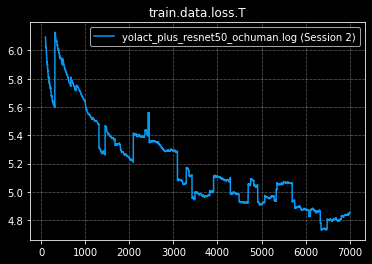

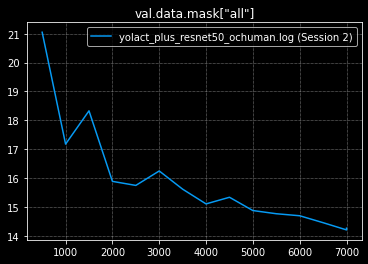

In [0]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp1/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

vis.add(log_file, session=2)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
# %cd /content/yolact

# Experiment 1
# 'max_iter': 7000
# 'lr_steps': (.35 * 7000, .75 * 7000, .88 * 7000, .93 * 7000)
# !python train.py --config=yolact_plus_resnet50_ochuman_config --resume=weights/yolact_plus_resnet50_54_800000.pth --eval_only_person --validation_epoch=1 --start_iter=0 --batch_size=7 --save_interval=500 --lr=1e-4 --momentum=0.9 --decay=5e-4 --gamma=0.1

/content/yolact
Scaling parameters by 0.88 to account for a batch size of 7.
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
loading annotations into memory...
Done (t=0.16s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 1.010 | C: 2.349 | M: 3.618 | S: 0.500 | I: 1.842 | T: 9.319 || ETA: 0:00:00 || timer: 5.961
[  0]      10 || B: 1.116 | C: 2.298 | M: 3.190 | S: 0.303 | I: 0.905 | T: 7.811 || ETA: 3:47:46 || timer: 1.714
[  0]      20 || B: 1.086 | C: 1.993 | M: 3.183 | S: 0.303 | I: 0.810 | T: 7.374 || ETA: 3:46:42 || timer: 1.700
[  0]      30 || B: 1.007 | C: 1.778 | M: 3.169 | S: 0.335 | I: 0.718 | T: 7.007 || ETA: 3:46:30 || timer: 1.699
[  0]      40 || B: 0.974 | C: 1.633 | M: 3.097 | S: 0.315 | I: 0.682 | T: 6.702 || ETA: 3:46:11 || timer: 1.695
[  0]      50 || B: 0.968 | C: 1.551 | M: 3.149 | S: 0.312 | I: 0.676 | T: 6.657 || ETA: 3:45:57 || ti

In [41]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp2"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp2"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 2
# 'max_iter': 3000
# 'lr_steps': (.35 * 3000, .75 * 3000, .88 * 3000, .93 * 3000)
!python train.py --save_folder="{save_folder}" --log_folder="{log_folder}" --config=yolact_plus_resnet50_ochuman_exp2_config --resume=weights/yolact_plus_resnet50_54_800000.pth --eval_only_person --validation_iter=250 --start_iter=0 --batch_size=8 --save_interval=250 --lr=1e-5 --momentum=0.9 --decay=5e-4 --gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=0.17s)
creating index...
index created!
loading annotations into memory...
Done (t=0.21s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 1.439 | C: 5.776 | M: 3.386 | S: 0.436 | I: 1.500 | T: 12.536 || ETA: 0:00:00 || timer: 6.594
[  0]      10 || B: 1.182 | C: 2.867 | M: 3.259 | S: 0.325 | I: 0.934 | T: 8.567 || ETA: 0:53:23 || timer: 1.063
[  0]      20 || B: 1.145 | C: 2.323 | M: 3.352 | S: 0.327 | I: 0.801 | T: 7.947 || ETA: 0:53:05 || timer: 1.077
[  0]      30 || B: 1.105 | C: 2.071 | M: 3.303 | S: 0.319 | I: 0.749 | T: 7.546 || ETA: 0:53:08 || timer: 1.072
[  0]      40 || B: 1.059 | C: 1.857 | M: 3.239 | S: 0.309 | I: 0.732 | T: 7.195 || ETA: 0:52:52 || timer: 1.063
[  0]      50 || B: 1.011 | C: 1.720 | M: 3.163 | S: 0.300 | I: 0.707 | T: 6.900 || ETA: 0:52:43 || timer: 1.067
[  0]      60 || B: 0.993 | C: 1.617 | M: 3.081 |

In [42]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp2/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

from utils.logger import LogVisualizer
vis = LogVisualizer()

# Print log sessions
vis.sessions(log_file)

/content/yolact
Session   0:     3014 entries | 1:36:28 elapsed


/content/yolact


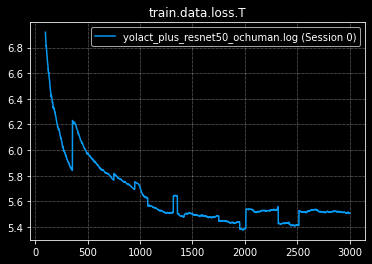

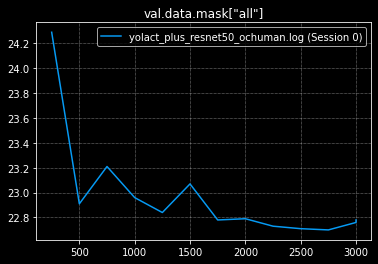

In [43]:
%cd /content/yolact
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp2/"
log_file = log_folder + "yolact_plus_resnet50_ochuman.log"

vis.add(log_file, session=0)

# Plot the training loss
vis.plot("train", "x.data.iter", "x.data.loss.T", smoothness=1000)
# Plot the validation accuracy (mAP)
vis.plot("val", "x.data.iter", 'x.data.mask["all"]')

In [0]:
%cd /content/yolact
save_folder = "/content/gdrive/My Drive/yolact/data/checkpoints/exp3"
log_folder = "/content/gdrive/My Drive/yolact/data/logs/exp3"
import os
if not os.path.exists(save_folder):
  os.mkdir(save_folder)
if not os.path.exists(log_folder):
  os.mkdir(log_folder)

# Experiment 3
# Here I have modified yolact.py in order to fine-tune only the final layer.
# Prior experiments fine-tuned the whole network!
# 'max_iter': 3000
# 'lr_steps': (.35 * 3000, .75 * 3000, .88 * 3000, .93 * 3000)
!python train.py --save_folder="{save_folder}" --log_folder="{log_folder}" --config=yolact_plus_resnet50_ochuman_exp3_config --resume=weights/yolact_plus_resnet50_54_800000.pth --eval_only_person --only_last_layer --validation_iter=250 --start_iter=0 --batch_size=8 --save_interval=250 --lr=1e-5 --momentum=0.9 --decay=5e-4 --gamma=0.1

/content/yolact
loading annotations into memory...
Done (t=0.20s)
creating index...
index created!
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Resuming training, loading weights/yolact_plus_resnet50_54_800000.pth...
Begin training!

[  0]       0 || B: 1.600 | C: 3.114 | M: 2.854 | S: 0.162 | I: 0.762 | T: 8.492 || ETA: 0:00:00 || timer: 8.307
[  0]      10 || B: 1.127 | C: 2.777 | M: 3.481 | S: 0.337 | I: 0.873 | T: 8.594 || ETA: 2:43:15 || timer: 3.341
[  0]      20 || B: 1.077 | C: 2.349 | M: 3.235 | S: 0.331 | I: 0.812 | T: 7.803 || ETA: 2:42:47 || timer: 3.220
[  0]      30 || B: 1.092 | C: 2.179 | M: 3.235 | S: 0.339 | I: 0.818 | T: 7.663 || ETA: 2:42:01 || timer: 3.242
[  0]      40 || B: 1.054 | C: 2.043 | M: 3.192 | S: 0.326 | I: 0.759 | T: 7.375 || ETA: 2:41:35 || timer: 3.249
[  0]      50 || B: 1.056 | C: 1.988 | M: 3.139 | S: 0.308 | I: 0.744 | T: 7.235 || ETA: 2:40:50 || timer: 3.252
[  0]      60 || B: 1.059 | C: 1.948 | M: 3.068 | 

# Evaluate fine-tuned model

## Evaluate on COCO Person val

In [0]:
%cd /content/yolact

!python eval.py --trained_model=weights/yolact_plus_resnet50_ochuman_0_500.pth --config=yolact_plus_resnet50_ochuman_config --only_person

/content/yolact
loading annotations into memory...
Done (t=0.19s)
creating index...
index created!
Loading model... Done.

Processing Images  ███░░░░░░░░░░░░░░░░░░░░░░░░░░░    302 /   2693 (11.21%)     9.87 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  █████████░░░░░░░░░░░░░░░░░░░░░    863 /   2693 (32.05%)     9.86 fps        Warning: Augmentation output an example with no ground truth. Resampling...
Processing Images  ██████████████████████████████   2693 /   2693 (100.00%)    10.04 fps        
Saving data...
Calculating mAP...

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 25.53 | 45.66 | 43.23 | 41.20 | 36.12 | 30.98 | 24.92 | 18.38 | 10.25 |  3.55 |  1.04 |
  mask | 19.17 | 38.07 | 34.93 | 31.45 | 27.11 | 22.61 | 17.20 | 11.83 |  6.14 |  2.01 |  0.35 |
-------+-------